In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy
import matplotlib.pyplot as plt
from DataDouble_definition import Data
from functionsDouble import *
from utilities import *

In [2]:
T  = 600
dt = 0.05

t_span = (0, T)
t_eval = np.arange(*t_span, dt)

In [3]:
y_init = np.array([
    Data['initial_VS_1'], Data['initial_VD_1'],
    Data['initial_w_1' ], Data['initial_n_1' ], Data['initial_h_1' ], Data['initial_c_1' ], Data['initial_q_1' ],
    Data['initial_Ca_1'],
    Data['initial_VS_2'], Data['initial_VD_2'],
    Data['initial_w_2' ], Data['initial_n_2' ], Data['initial_h_2' ], Data['initial_c_2' ], Data['initial_q_2' ],
    Data['initial_Ca_2']]
)

In [4]:
sol = EI(t_eval, dydt, y_init, Data)
if sol.success:
    print(sol.message)

The solver converged.


In [5]:
# sol = scipy.integrate.solve_ivp(fun = lambda t, y: dydt(t, y, Data),
#                                 t_span = t_span,
#                                 y0 = y_init,
#                                 t_eval = t_eval,
#                                 method = 'RK45',
#                                 atol = 1e-6,
#                                 rtol = 1e-6,
#                                 vectorized=False)

# if not sol.success:
#     raise RuntimeError("ODE solver failed: " + sol.message)
# else:
#     print("ODE solver succeeded")

In [6]:
# Extract all quantities of interest

time = sol.t

VS_1, VD_1, w_1, n_1, h_1, c_1, q_1, Ca_1 = sol.y[:8]
VS_2, VD_2, w_2, n_2, h_2, c_2, q_2, Ca_2 = sol.y[8:]

dVSdt_1, dVDdt_1, dwdt_1, dndt_1, dhdt_1, dcdt_1, dqdt_1, dCadt_1, \
    dVSdt_2, dVDdt_2, dwdt_2, dndt_2, dhdt_2, dcdt_2, dqdt_2, dCadt_2 = \
        dydt_vectorized(time, sol.y, Data)

# dVSdt_norm_1, dVDdt_norm_1, dwdt_norm_1, dndt_norm_1, dhdt_norm_1, dcdt_norm_1, dqdt_norm_1, dCadt_norm_1 = \
#     derivatives_1 / np.max(np.abs(derivatives_1), axis=1)[:, None]
# dVSdt_norm_2, dVDdt_norm_2, dwdt_norm_2, dndt_norm_2, dhdt_norm_2, dcdt_norm_2, dqdt_norm_2, dCadt_norm_2 = \
#     derivatives_2 / np.max(np.abs(derivatives_2), axis=1)[:, None]

IS_1, ID_1, IDS_1, INa_1, IK_1, ISL_1, ICa_1, IKC_1, IKAHP_1, IDL_1, \
    IS_2, ID_2, IDS_2, INa_2, IK_2, ISL_2, ICa_2, IKC_2, IKAHP_2, IDL_2 = \
        computeCurrents_vectorized(time, sol.y, Data)

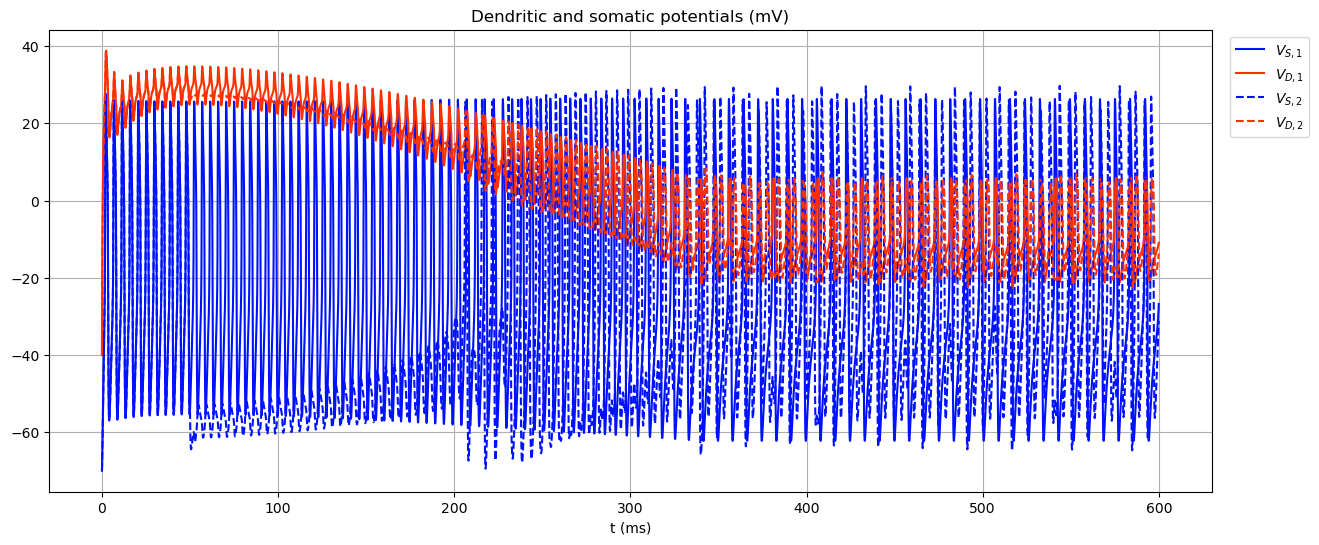

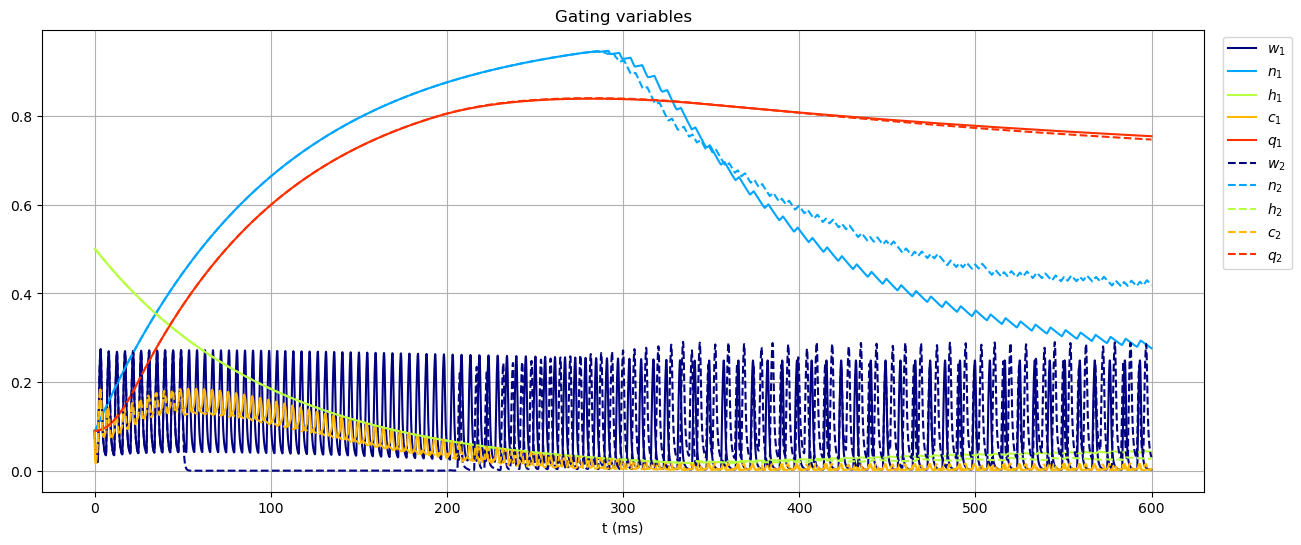

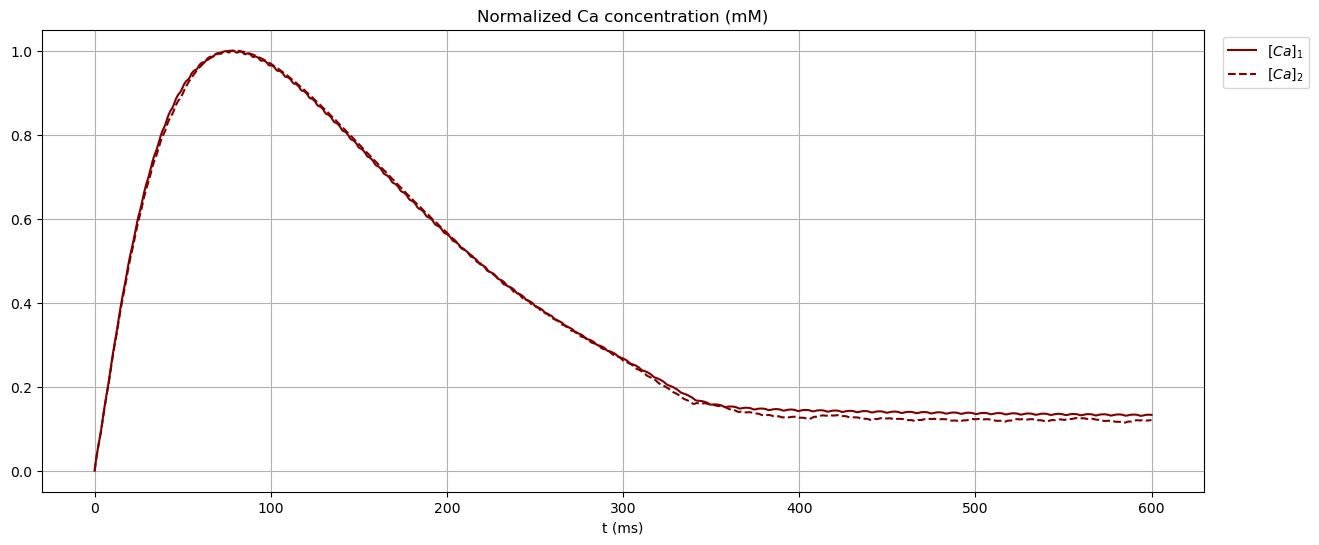

In [7]:
cmap = plt.get_cmap('jet')
colors = cmap(np.linspace(0, 1, 8))
figsize = (15, 6)

plt.figure(figsize=figsize)
plt.plot(time, VS_1, label='$V_{S, 1}$', color=colors[1])
plt.plot(time, VD_1, label='$V_{D, 1}$', color=colors[6])
plt.plot(time, VS_2, label='$V_{S, 2}$', color=colors[1], linestyle='--')
plt.plot(time, VD_2, label='$V_{D, 2}$', color=colors[6], linestyle='--')
plt.xlabel('t (ms)')
plt.title('Dendritic and somatic potentials (mV)')
plt.legend(loc='upper left', bbox_to_anchor=(1.01, 1))
plt.grid()
plt.show()

plt.figure(figsize=figsize)
plt.plot(time, w_1, label='$w_1$', color=colors[0])
plt.plot(time, n_1, label='$n_1$', color=colors[2])
plt.plot(time, h_1, label='$h_1$', color=colors[4])
plt.plot(time, c_1, label='$c_1$', color=colors[5])
plt.plot(time, q_1, label='$q_1$', color=colors[6])
plt.plot(time, w_2, label='$w_2$', color=colors[0], linestyle='--')
plt.plot(time, n_2, label='$n_2$', color=colors[2], linestyle='--')
plt.plot(time, h_2, label='$h_2$', color=colors[4], linestyle='--')
plt.plot(time, c_2, label='$c_2$', color=colors[5], linestyle='--')
plt.plot(time, q_2, label='$q_2$', color=colors[6], linestyle='--')
plt.xlabel('t (ms)')
plt.title('Gating variables')
plt.legend(loc='upper left', bbox_to_anchor=(1.01, 1))
plt.grid()
plt.show()

plt.figure(figsize=figsize)
plt.plot(time, Ca_1/np.max(Ca_1), label='$[Ca]_1$', color=colors[7])
plt.plot(time, Ca_2/np.max(Ca_2), label='$[Ca]_2$', color=colors[7], linestyle='--')
plt.xlabel('t (ms)')
plt.title('Normalized Ca concentration (mM)')
plt.legend(loc='upper left', bbox_to_anchor=(1.01, 1))
plt.grid()
plt.show()

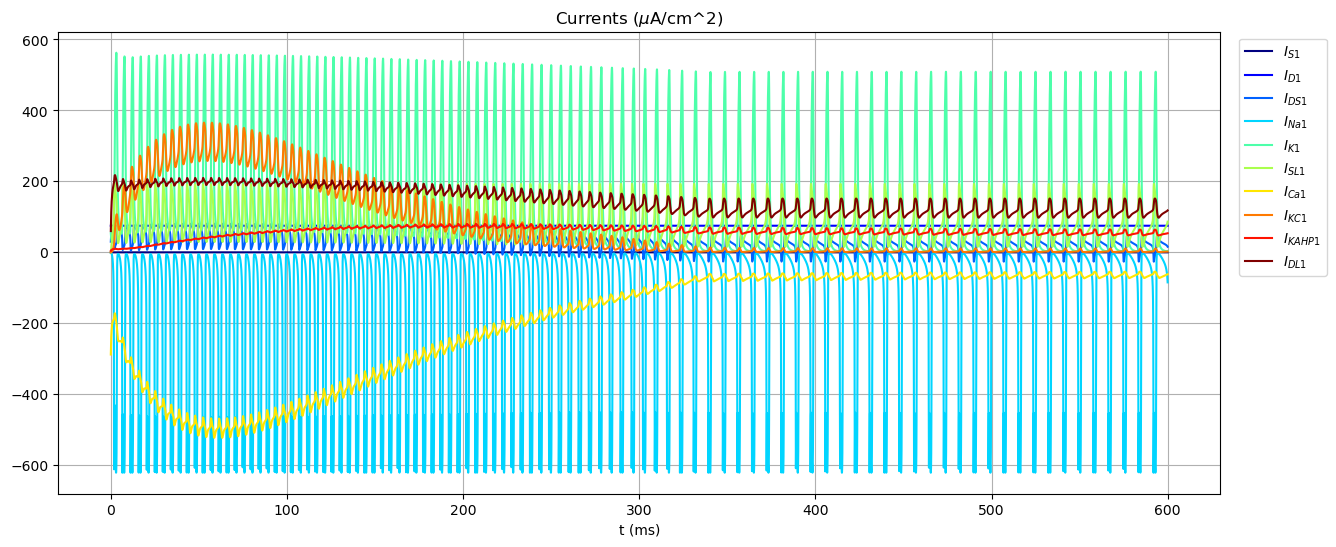

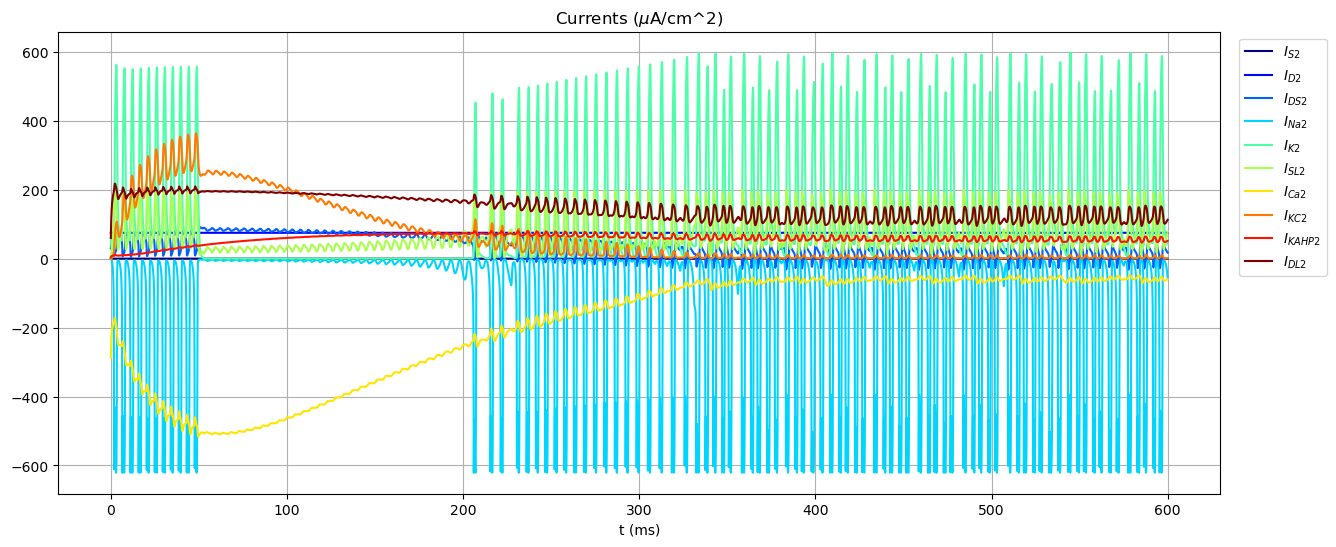

In [8]:
cmap = plt.get_cmap('jet')
colors = cmap(np.linspace(0, 1, 10))
figsize=(15, 6)

plt.figure(figsize=figsize)
plt.plot(time, IS_1   , label='$I_{S1}$'   , color=colors[0])
plt.plot(time, ID_1   , label='$I_{D1}$'   , color=colors[1])
plt.plot(time, IDS_1  , label='$I_{DS1}$'  , color=colors[2])
plt.plot(time, INa_1  , label='$I_{Na1}$'  , color=colors[3])
plt.plot(time, IK_1   , label='$I_{K1}$'   , color=colors[4])
plt.plot(time, ISL_1  , label='$I_{SL1}$'  , color=colors[5])
plt.plot(time, ICa_1  , label='$I_{Ca1}$'  , color=colors[6])
plt.plot(time, IKC_1  , label='$I_{KC1}$'  , color=colors[7])
plt.plot(time, IKAHP_1, label='$I_{KAHP1}$', color=colors[8])
plt.plot(time, IDL_1  , label='$I_{DL1}$'  , color=colors[9])
plt.xlabel('t (ms)')
plt.title(r'Currents ($\mu$A/cm^2)')
plt.legend(loc='upper left', bbox_to_anchor=(1.01, 1))
plt.grid()
plt.show()

plt.figure(figsize=figsize)
plt.plot(time, IS_2   , label='$I_{S2}$'   , color=colors[0])
plt.plot(time, ID_2   , label='$I_{D2}$'   , color=colors[1])
plt.plot(time, IDS_2  , label='$I_{DS2}$'  , color=colors[2])
plt.plot(time, INa_2  , label='$I_{Na2}$'  , color=colors[3])
plt.plot(time, IK_2   , label='$I_{K2}$'   , color=colors[4])
plt.plot(time, ISL_2  , label='$I_{SL2}$'  , color=colors[5])
plt.plot(time, ICa_2  , label='$I_{Ca2}$'  , color=colors[6])
plt.plot(time, IKC_2  , label='$I_{KC2}$'  , color=colors[7])
plt.plot(time, IKAHP_2, label='$I_{KAHP2}$', color=colors[8])
plt.plot(time, IDL_2  , label='$I_{DL2}$'  , color=colors[9])
plt.xlabel('t (ms)')
plt.title(r'Currents ($\mu$A/cm^2)')
plt.legend(loc='upper left', bbox_to_anchor=(1.01, 1))
plt.grid()
plt.show()

In [9]:
# cmap = plt.get_cmap('jet')
# colors = cmap(np.linspace(0, 1, 10))
# figsize=(16, 6)

# plt.figure(figsize=figsize)
# plt.plot(time, dVSdt_1, label='$dV_S1/dt$'  , color=colors[0])
# plt.plot(time, dVDdt_1, label='$dV_D1/dt$'  , color=colors[1])
# plt.plot(time, dwdt_1 , label='$dw_1/dt$'   , color=colors[2])
# plt.plot(time, dndt_1 , label='$dn_1/dt$'   , color=colors[3])
# plt.plot(time, dhdt_1 , label='$dh_1/dt$'   , color=colors[4])
# plt.plot(time, dcdt_1 , label='$dc_1/dt$'   , color=colors[5])
# plt.plot(time, dqdt_1 , label='$dq_1/dt$'   , color=colors[6])
# plt.plot(time, dCadt_1, label='$d[Ca_1]/dt$', color=colors[7])
# plt.xlabel('t (ms)')
# plt.title('Derivatives')
# plt.legend(loc='upper left', bbox_to_anchor=(1.01, 1))
# plt.grid()
# plt.show()

# plt.figure(figsize=figsize)
# plt.plot(time, dVSdt_2, label='$dV_S2/dt$'  , color=colors[0])
# plt.plot(time, dVDdt_2, label='$dV_D2/dt$'  , color=colors[1])
# plt.plot(time, dwdt_2 , label='$dw_2/dt$'   , color=colors[2])
# plt.plot(time, dndt_2 , label='$dn_2/dt$'   , color=colors[3])
# plt.plot(time, dhdt_2 , label='$dh_2/dt$'   , color=colors[4])
# plt.plot(time, dcdt_2 , label='$dc_2/dt$'   , color=colors[5])
# plt.plot(time, dqdt_2 , label='$dq_2/dt$'   , color=colors[6])
# plt.plot(time, dCadt_2, label='$d[Ca_2]/dt$', color=colors[7])
# plt.xlabel('t (ms)')
# plt.title('Derivatives')
# plt.legend(loc='upper left', bbox_to_anchor=(1.01, 1))
# plt.grid()
# plt.show()

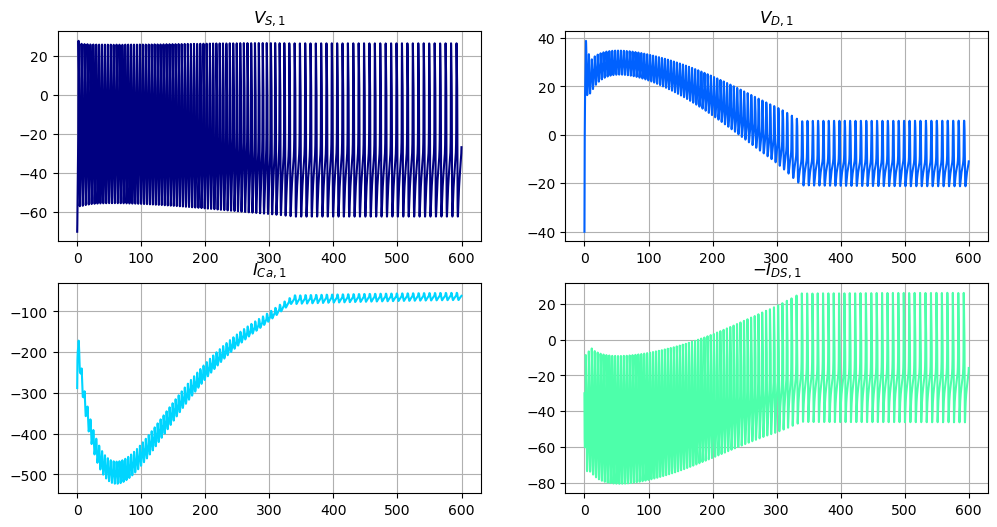

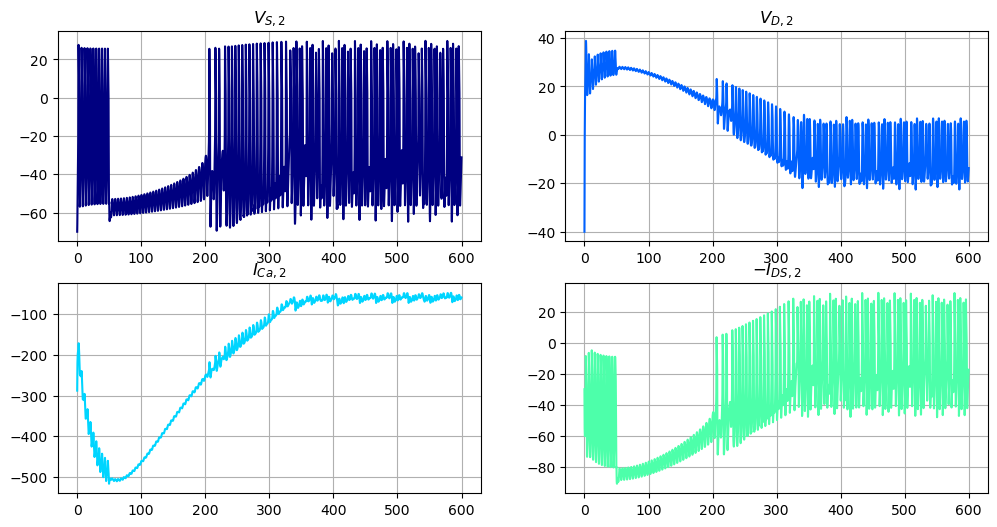

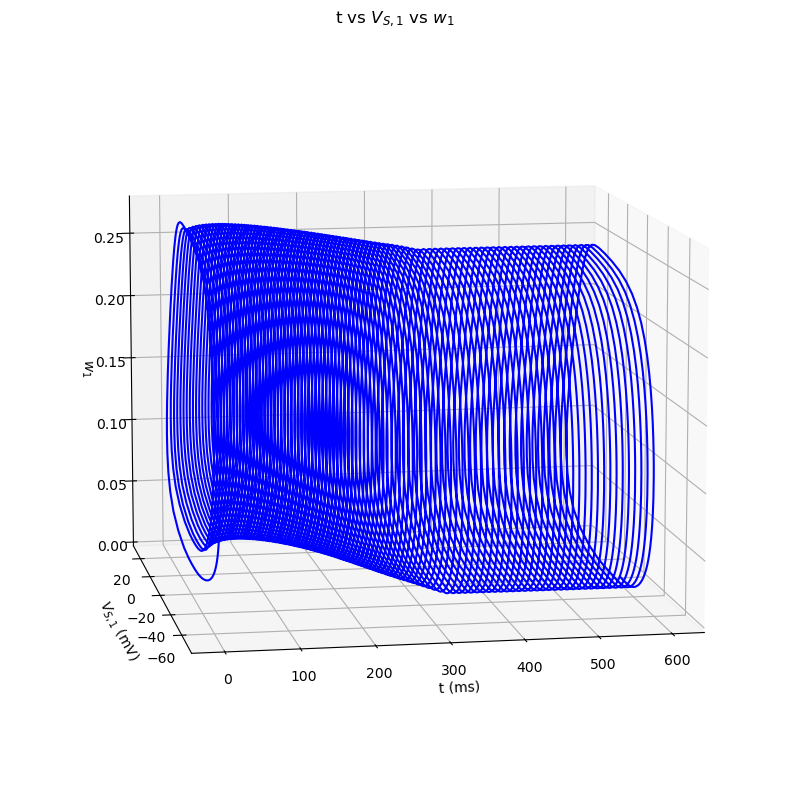

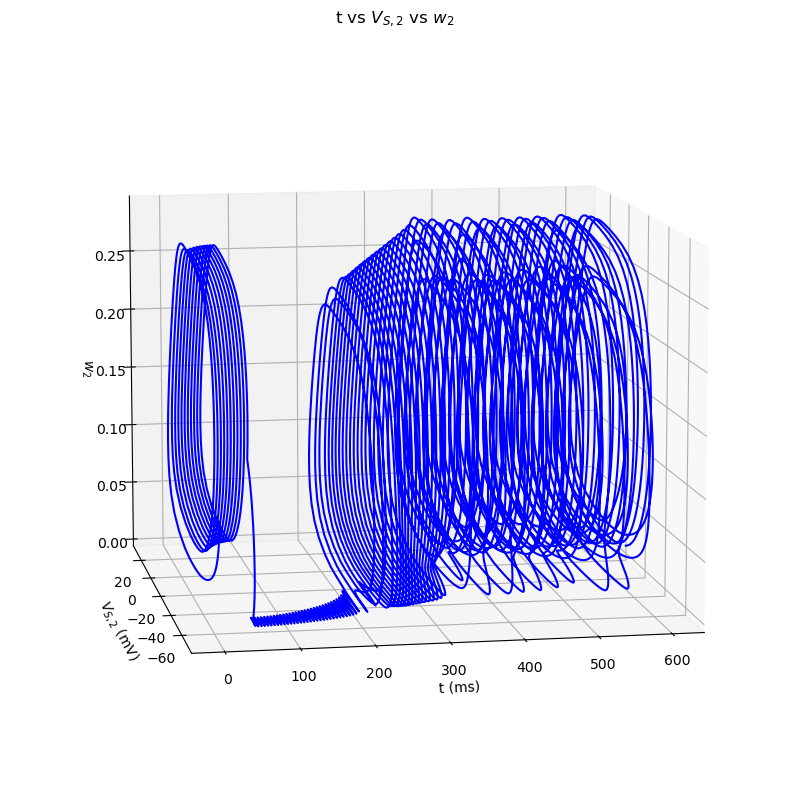

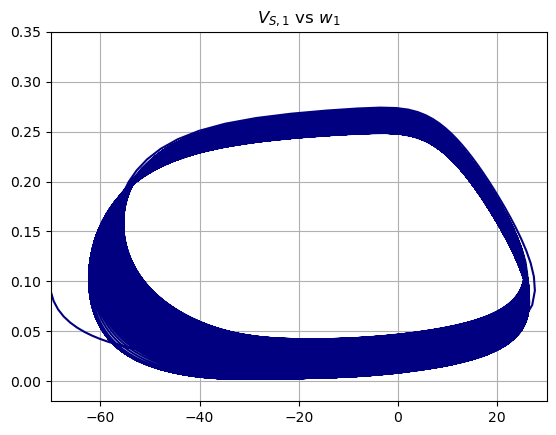

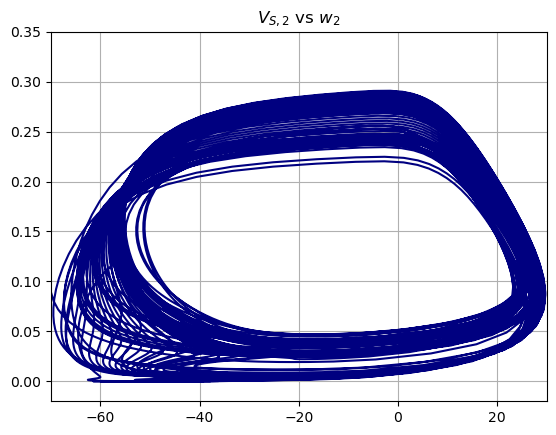

In [10]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(time, VS_1, color=colors[0])
plt.title('$V_{S, 1}$')
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(time, VD_1, color=colors[2])
plt.title('$V_{D, 1}$')
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(time, ICa_1, color=colors[3])
plt.title('$I_{Ca, 1}$')
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(time, -IDS_1, color=colors[4])
plt.title('$-I_{DS, 1}$')
plt.grid()


plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(time, VS_2, color=colors[0])
plt.title('$V_{S, 2}$')
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(time, VD_2, color=colors[2])
plt.title('$V_{D, 2}$')
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(time, ICa_2, color=colors[3])
plt.title('$I_{Ca, 2}$')
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(time, -IDS_2, color=colors[4])
plt.title('$-I_{DS, 2}$')
plt.grid()


fig = plt.figure(figsize=(18, 10)) 
ax = plt.axes(projection='3d')
ax.plot(time, VS_1, w_1, color=colors[1])
ax.view_init(10, 260)
plt.title("t vs $V_{S, 1}$ vs $w_1$")
ax.set_xlabel('t (ms)')
ax.set_ylabel('$V_{S, 1}$ (mV)')
ax.set_zlabel('$w_1$')
plt.grid()


fig = plt.figure(figsize=(18, 10)) 
ax = plt.axes(projection='3d')
ax.plot(time, VS_2, w_2, color=colors[1])
ax.view_init(10, 260)
plt.title("t vs $V_{S, 2}$ vs $w_2$")
ax.set_xlabel('t (ms)')
ax.set_ylabel('$V_{S, 2}$ (mV)')
ax.set_zlabel('$w_2$')
plt.grid()



plt.figure()
plt.plot(VS_1, w_1, color=colors[0])
plt.xlim(-70, 30)
plt.ylim(-0.02, 0.35)
plt.title("$V_{S, 1}$ vs $w_1$")
plt.grid()


plt.figure()
plt.plot(VS_2, w_2, color=colors[0])
plt.xlim(-70, 30)
plt.ylim(-0.02, 0.35)
plt.title("$V_{S, 2}$ vs $w_2$")
plt.grid()

17.851737116978384


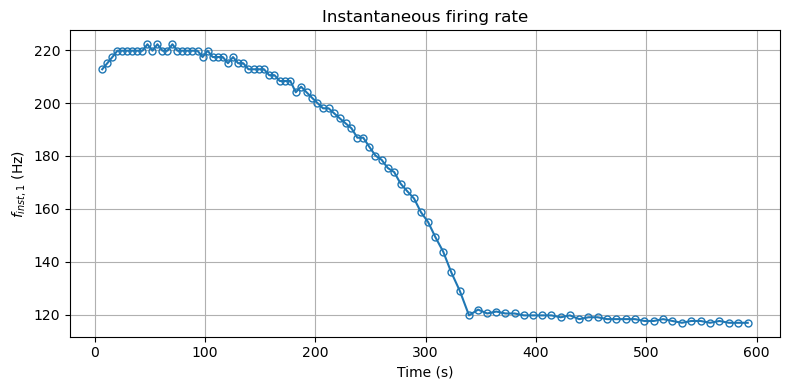

19.754602378635695


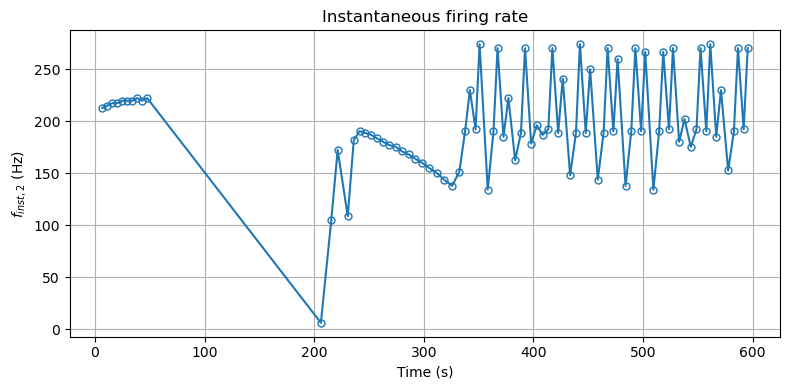

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Detect spikes
thresh_1 = np.max(VS_1) - (np.max(VS_1)-np.min(VS_1))*0.1
print(thresh_1)
spike_times = time[np.where((VS_1[:-1] < thresh_1) & (VS_1[1:] >= thresh_1))[0]]

# Compute instantaneous firing rate
inst_rate = 1e3 / np.diff(spike_times)
rate_times = spike_times[1:]

plt.figure(figsize=(8, 4))
plt.plot(rate_times, inst_rate, marker='o', fillstyle='none', markersize=5)
plt.xlabel('Time (s)')
plt.ylabel(r'$f_{inst, 1}$ (Hz)')
plt.title('Instantaneous firing rate')
plt.tight_layout()
plt.grid()
plt.show()


# Detect spikes
thresh_2 = np.max(VS_2) - (np.max(VS_2)-np.min(VS_2))*0.1
print(thresh_2)
spike_times = time[np.where((VS_2[:-1] < thresh_2) & (VS_2[1:] >= thresh_2))[0]]

# Compute instantaneous firing rate
inst_rate = 1e3 / np.diff(spike_times)
rate_times = spike_times[1:]

plt.figure(figsize=(8, 4))
plt.plot(rate_times, inst_rate, marker='o', fillstyle='none', markersize=5)
plt.xlabel('Time (s)')
plt.ylabel(r'$f_{inst, 2}$ (Hz)')
plt.title('Instantaneous firing rate')
plt.tight_layout()
plt.grid()
plt.show()